In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join('/kaggle/input/housing-price-prediction/Housing.csv'))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housing-price-prediction/Housing.csv


In [2]:
data=pd.read_csv('/kaggle/input/housing-price-prediction/Housing.csv')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


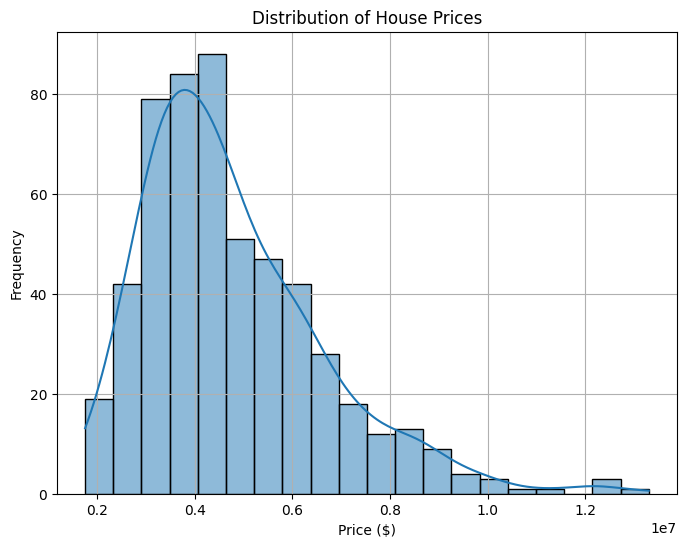

In [3]:
plt.figure(figsize=(8,6))
sns.histplot(data['price'],bins=20,kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.xlabel("Price ($)")
plt.grid(True)
plt.show()

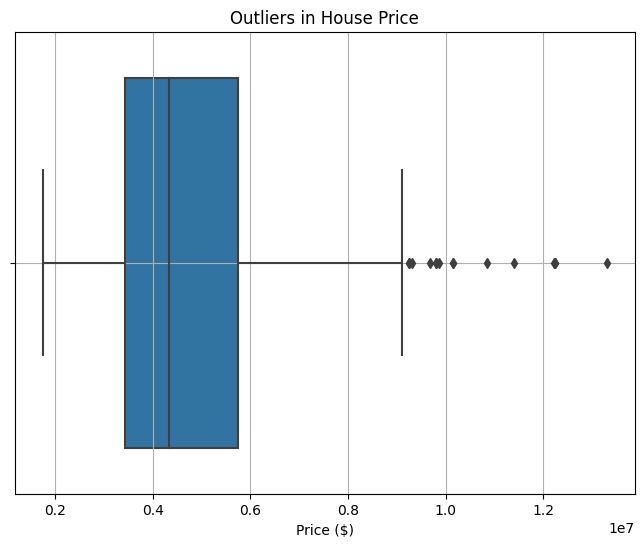

In [4]:
plt.figure(figsize=(8,6))
sns.boxplot(data=data, x='price')
plt.title("Outliers in House Price")
plt.xlabel("Price ($)")
plt.grid(True)
plt.show()

In [5]:
data=data[data['price']<9000000] # Removing extreme outliers for demonstration
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
17,8960000,8500,3,2,4,yes,no,no,no,yes,2,no,furnished
18,8890000,4600,3,2,2,yes,yes,no,no,yes,2,no,furnished
19,8855000,6420,3,2,2,yes,no,no,no,yes,1,yes,semi-furnished
20,8750000,4320,3,1,2,yes,no,yes,yes,no,2,no,semi-furnished
21,8680000,7155,3,2,1,yes,yes,yes,no,yes,2,no,unfurnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [6]:
def find_boundaries(variable):
    q1 = data[variable].quantile(0.25)
    q3 = data[variable].quantile(0.75)
    iqr = q3 - q1
    lower_boundary = q1 - 1.5 *iqr
    upper_boundary = q3 + 1.5* iqr
    return lower_boundary, upper_boundary

lower_price, upper_price = find_boundaries('price')
data.price = np.where(data.price>upper_price, upper_price, data.price)
data.price = np.where(data.price<lower_price, lower_price, data.price)
data.price

17     8855000.0
18     8855000.0
19     8855000.0
20     8750000.0
21     8680000.0
         ...    
540    1820000.0
541    1767150.0
542    1750000.0
543    1750000.0
544    1750000.0
Name: price, Length: 528, dtype: float64

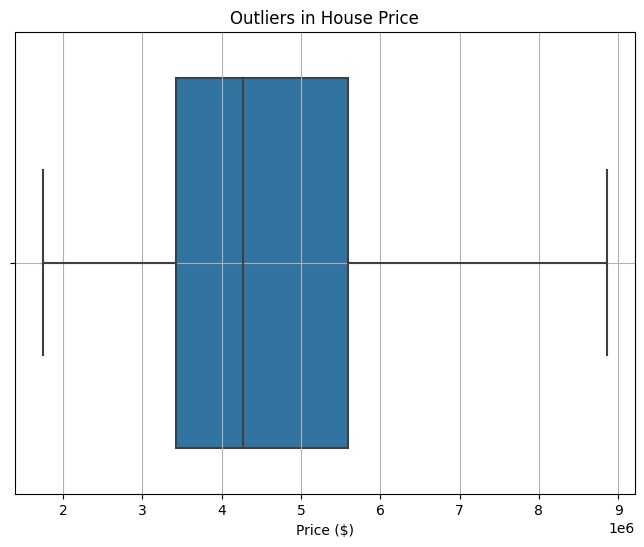

In [7]:
plt.figure(figsize=(8,6))
sns.boxplot(data=data, x='price')
plt.title("Outliers in House Price")
plt.xlabel("Price ($)")
plt.grid(True)
plt.show()

In [8]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=[float,int])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
print(correlation_matrix)

              price      area  bedrooms  bathrooms   stories   parking
price      1.000000  0.511642  0.323128   0.460610  0.436452  0.323307
area       0.511642  1.000000  0.109293   0.132166  0.063436  0.343992
bedrooms   0.323128  0.109293  1.000000   0.349523  0.404938  0.105479
bathrooms  0.460610  0.132166  0.349523   1.000000  0.308414  0.128327
stories    0.436452  0.063436  0.404938   0.308414  1.000000  0.018348
parking    0.323307  0.343992  0.105479   0.128327  0.018348  1.000000


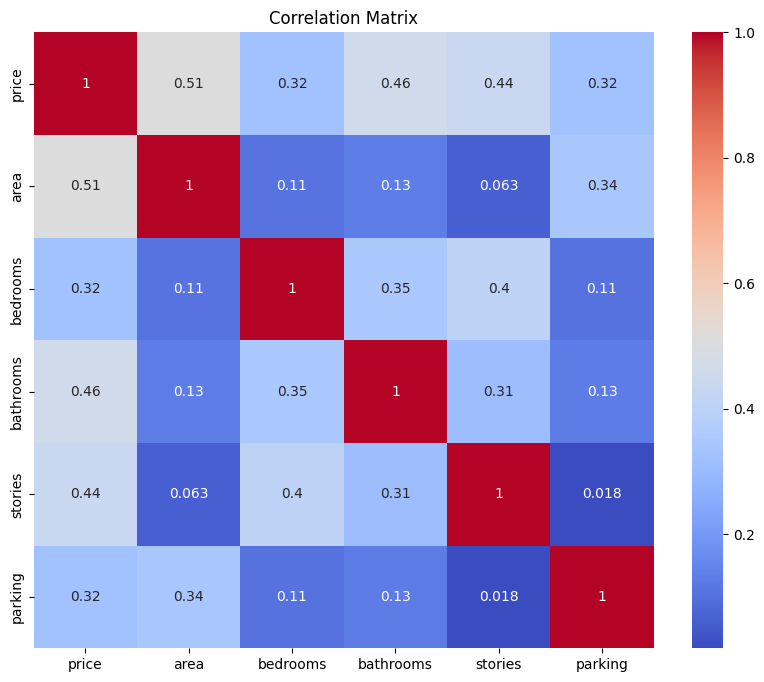

In [9]:
# Visualize correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

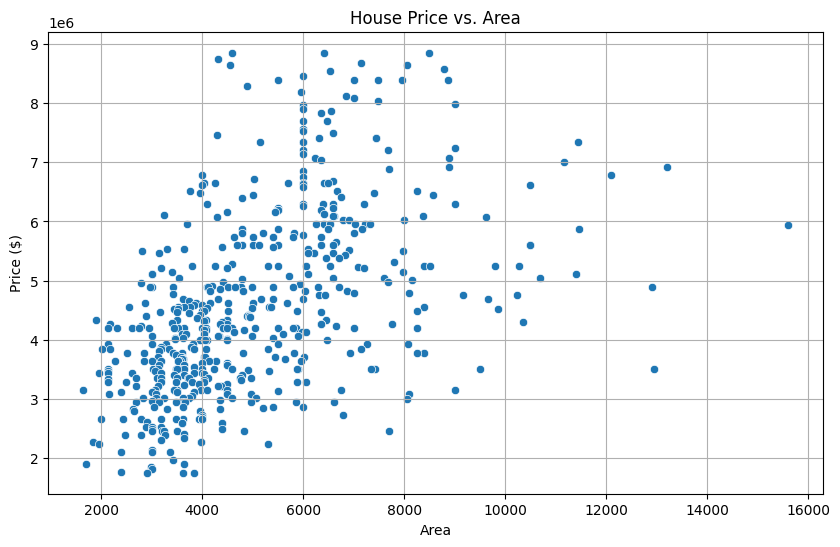

In [10]:
# Data Visualization
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='area', y='price')
plt.title("House Price vs. Area")
plt.xlabel("Area")
plt.ylabel("Price ($)")
plt.grid(True)
plt.show()